In [104]:
import numpy as np
import torch
from PIL import Image
import torchvision.transforms as transforms
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

**QUESTION 1**

**I HAVE USED GOOGLE COLAB FOR DOING THIS COMPLETE ASSIGNMENT 2. USING REMOTE DESKTOP/LAPTOP GPU(JUPYTER NOTEBOOK) MAY REQUIRE MODIFYING CERTAIN PART OF THE CODE OR INSTALL CERTAIN LIBRARIES.SIR/MAAM, YOU CAN UPLOAD THIS NOTEBOOK IN GOOGLE COLAB TO TEST THE CODE MORE BETTER.**

In [105]:
!pip install kaggle


In [3]:

os.environ['KAGGLE_USERNAME'] = 'mlenthusiast567'
os.environ['KAGGLE_KEY'] = 'a42169d0f0d3e13a33e4c031f4364c3e'


In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()

In [5]:
api.authenticate()


In cell below, I have downloaded the given dataset directly from Kaggle into the current working directory

In [6]:
! kaggle datasets download jeffheaton/count-the-paperclips


100% 1.65G/1.65G [00:14<00:00, 165MB/s]
100% 1.65G/1.65G [00:14<00:00, 121MB/s]


In [7]:
import zipfile


local_zip = '/content/count-the-paperclips.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/count the paperclips')
zip_ref.close()

In [8]:
training_set=pd.read_csv("/content/count the paperclips/train.csv")

In [9]:
training_set

,id,clip_count
0,30001,11
1,30002,2
2,30003,26
3,30004,41
4,30005,49
...,...,...
19995,49996,35
19996,49997,54
19997,49998,72
19998,49999,24


In [10]:
training_dict={}
for i in range(len(training_set["id"])):
  training_dict[training_set["id"][i]]=training_set["clip_count"][i]

In [11]:
'''
Here, I have created a list that stores "id's" of all the images in the training set
'''
train_img_ids_list=[]
#len(training_set["id"])
for i in range(len(training_set["id"])):
  train_img_ids_list.append(training_set["id"][i])

In [12]:
len(train_img_ids_list) #The output of this should be 20000(Size of Training Set)

20000

The data_loader() function I have defined below takes as input the **train_img_ids_list** and **training_set**(which is basically the train.csv file). It generates a random Image ID from the training set and provides as output the path to that image and the training_label(which is basically the ***number of clips***)

In [13]:
import random
def data_loader(train_img_ids_list,training_set):
  '''
  I have already created the training_set to store train.csv and hence I am taking it as an input to the function
  '''
  input_img_id=random.randint(0,len(train_img_ids_list)-1)
  input_img_id_1=train_img_ids_list[input_img_id]
  image_path_dir='/content/count the paperclips/clips-data-2020/clips'
  image_path=os.path.join(image_path_dir,'clips-'+str(input_img_id_1)+'.png')
  #img=cv2.imread(image_path)
  #RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  training_label=training_set["clip_count"][input_img_id]

  return image_path,training_label,input_img_id_1



In [14]:
image_path,training_label,image_id=data_loader(train_img_ids_list,training_set)

In [15]:
image_path

'/content/count the paperclips/clips-data-2020/clips/clips-38254.png'

In [16]:
training_label

44

In [17]:
img=cv2.imread(image_path)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

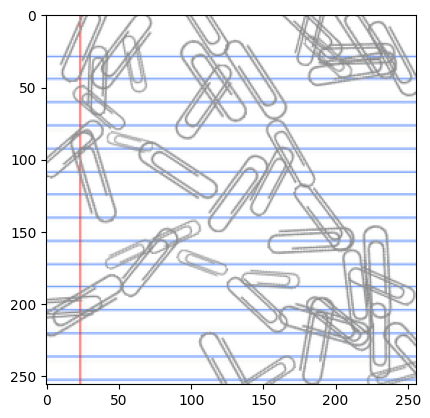

In [18]:
plt.imshow(RGB_img)


In the next cell, I have converted the image to a Tensor

In [19]:
#image = Image.open(img)
def convert_to_Tensor(image):
  transform = transforms.Compose([transforms.ToTensor()])
  img_tensor = transform(image)
  return img_tensor


In [20]:
img_tensor=convert_to_Tensor(RGB_img)
print(img_tensor)
#img_tensor.size()


tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.6078, 0.6078, 0.6078,  ..., 0.6078, 0.6078, 0.6078],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9569, 0.9569, 0.9569,  ..., 0.9569, 0.9569, 0.9569]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.7255, 0.7255, 0.7255,  ..., 0.7255, 0.7255, 0.7255],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [21]:
img_tensor.size()

torch.Size([3, 256, 256])

The above command(and output) shows that the shape of the image is in the form (channels,height,width)

In [22]:
#I have created a folder named RESIZED_IMAGE_FOLDER in the current working directory
!mkdir RESIZED_IMAGE_FOLDER


In [23]:
#I have saved the resized image in the above created folder
resized_image=cv2.resize(RGB_img,(28,28))
resized_image_output_path=os.path.join('/content/RESIZED_IMAGE_FOLDER','resized_image.png')
cv2.imwrite(resized_image_output_path,resized_image)

True

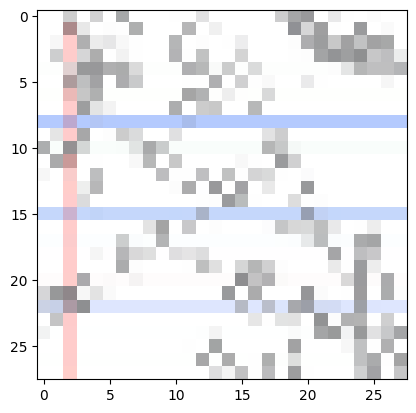

In [24]:
plt.imshow(resized_image)

In [25]:
resized_image_Tensor=convert_to_Tensor(resized_image)
print(resized_image_Tensor)

tensor([[[1.0000, 1.0000, 0.8078,  ..., 0.9882, 1.0000, 1.0000],
         [1.0000, 1.0000, 0.6745,  ..., 1.0000, 0.9804, 1.0000],
         [1.0000, 0.9686, 1.0000,  ..., 0.6353, 0.6549, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.6902, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 0.6667, 0.9961, 0.6431],
         [1.0000, 1.0000, 1.0000,  ..., 0.6353, 1.0000, 0.7765]],

        [[1.0000, 1.0000, 0.8078,  ..., 0.9882, 1.0000, 1.0000],
         [1.0000, 1.0000, 0.5412,  ..., 1.0000, 0.9804, 1.0000],
         [1.0000, 0.9686, 0.8000,  ..., 0.6353, 0.6588, 1.0000],
         ...,
         [1.0000, 1.0000, 0.8000,  ..., 0.9961, 0.6902, 1.0000],
         [1.0000, 1.0000, 0.8000,  ..., 0.6706, 0.9961, 0.6431],
         [1.0000, 1.0000, 0.8078,  ..., 0.6353, 1.0000, 0.7765]],

        [[1.0000, 1.0000, 0.8078,  ..., 0.9882, 1.0000, 1.0000],
         [1.0000, 1.0000, 0.5451,  ..., 1.0000, 0.9804, 1.0000],
         [1.0000, 0.9686, 0.7961,  ..., 0.6392, 0.6588, 1.

In [26]:
resized_image_Tensor.size()

torch.Size([3, 28, 28])

I have performed rotation of image next. I have defined a function for the same. My roll number is 20QM30001. So, the last 2 digits means 1. Hence, I have done random rotations between [-1,1] degrees(for image augmentation).

In [27]:
'''
I have created a folder named "ROTATED_IMAGE_FOLDER" in the current working directory and saved the
Rotated Image in the folder.
'''
!mkdir ROTATED_IMAGE_FOLDER
def random_rotation_augmentation(input_image_path,output_image_path,angle_range=(-1, 1)):
    image = Image.open(input_image_path)

    rotation_angle = random.uniform(angle_range[0], angle_range[1])

    rotated_image = image.rotate(rotation_angle)

    rotated_image.save(output_image_path)



In [28]:
'''
The above function saves the Output Image(obtained after random rotation) in a certain specified directory which
I created. The name of the directory is "OUTPUT_IMAGE_FOLDER"
'''

resized_image_path = "/content/RESIZED_IMAGE_FOLDER/resized_image.png"


random_rotation_augmentation(resized_image_path,'/content/ROTATED_IMAGE_FOLDER/Rotated_Image.png')


I defined a function to read Image from a directory using cv2 and read it in the order of "R,G,B".

In [29]:
def read_image(image_path):
  image=cv2.imread(image_path)
  #RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  return image


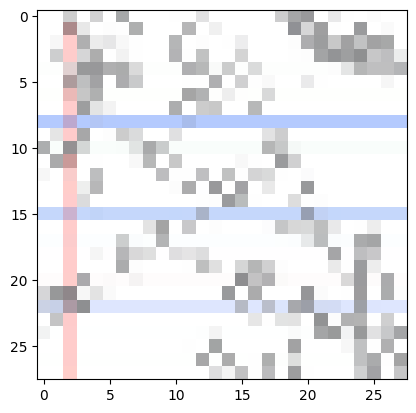

In [30]:
#This cell shows the Output Image(which is randomly rotated in the range(-1,1))
img_resized_rotated=cv2.imread('/content/ROTATED_IMAGE_FOLDER/Rotated_Image.png')
plt.imshow(img_resized_rotated)

Next, I have performed Random Horizontal Flipping with probability value of 1/100=0.01.(as the last 2 digits of my roll no. is 01)

In [31]:
def random_horizontal_flipping(image,probability=0.01):
  if np.random.rand() < probability: #To randomly flip the image
    image = cv2.flip(image, 1)
  return image


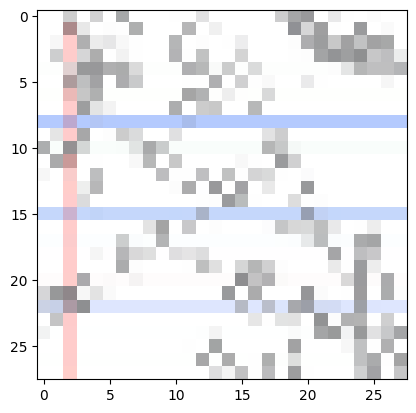

In [32]:
H_flipped_image=random_horizontal_flipping(img_resized_rotated)
#RGB_H_flipped_image=cv2.cvtColor(H_flipped_image,cv2.COLOR_BGR2RGB)
plt.imshow(H_flipped_image)

In [33]:
H_flipped_image_Tensor=convert_to_Tensor(H_flipped_image)
print(H_flipped_image_Tensor)

tensor([[[1.0000, 1.0000, 0.8078,  ..., 0.9882, 1.0000, 1.0000],
         [1.0000, 1.0000, 0.6745,  ..., 1.0000, 0.9804, 1.0000],
         [1.0000, 0.9686, 1.0000,  ..., 0.6353, 0.6549, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.6902, 1.0000],
         [0.9961, 0.9961, 0.9961,  ..., 0.6667, 0.9961, 0.6431],
         [1.0000, 1.0000, 1.0000,  ..., 0.6353, 1.0000, 0.7765]],

        [[1.0000, 1.0000, 0.8078,  ..., 0.9882, 1.0000, 1.0000],
         [1.0000, 1.0000, 0.5412,  ..., 1.0000, 0.9804, 1.0000],
         [1.0000, 0.9686, 0.8000,  ..., 0.6353, 0.6588, 1.0000],
         ...,
         [1.0000, 1.0000, 0.8000,  ..., 0.9961, 0.6902, 1.0000],
         [1.0000, 1.0000, 0.8000,  ..., 0.6706, 0.9961, 0.6431],
         [1.0000, 1.0000, 0.8078,  ..., 0.6353, 1.0000, 0.7765]],

        [[1.0000, 1.0000, 0.8078,  ..., 0.9882, 1.0000, 1.0000],
         [1.0000, 1.0000, 0.5451,  ..., 1.0000, 0.9804, 1.0000],
         [1.0000, 0.9686, 0.7961,  ..., 0.6392, 0.6588, 1.

For Normalizing each channel of the image, 1st I need to convert the img_tensor(Tensor form of the Image) to a Numpy array and then compute the mean and standard deviation.

In [34]:
numpy_img=H_flipped_image_Tensor.numpy()
numpy_img.shape

(3, 28, 28)

The cell below takes in an input array(2-D array),creates a duplicate array of it, computes the mean and standard deviation, normalizes each element of the duplicated array and gives as output the duplicated array

In [35]:
'''
numpy_img[0] : This would denote a (256,256) dimensional array corresponding to the R channel
numpy_img[1] : This would denote a (256,256) dimensional array corresponding to the G channel
numpy_img[2] : This would denote a (256,256) dimensional array corresponding to the B channel
'''
import math

def Normalize_matrix(input_arr):
  r=input_arr.shape[0]
  c=input_arr.shape[1]
  output_arr=np.zeros((r,c))
  for i in range(r):
    for j in range(c):
      output_arr[i][j]=input_arr[i][j]
  sum=0
  for i in range(r):
    for j in range(c):
      sum=sum+output_arr[i][j]
  mean=sum/(r*c)
  output_arr=output_arr-mean
  sq_sum=0
  for i in range(r):
    for j in range(c):
      sq_sum=sq_sum+(output_arr[i][j])**2
  tot_nums=(r*c)
  variance=sq_sum/(tot_nums-1)
  st_dev=math.sqrt(variance)
  for i in range(r):
    for j in range(c):
      output_arr[i][j]=output_arr[i][j]/st_dev

  return output_arr


In [36]:
R_channel_normalized_output=Normalize_matrix(numpy_img[0])
G_channel_normalized_output=Normalize_matrix(numpy_img[1])
B_channel_normalized_output=Normalize_matrix(numpy_img[2])

In [37]:
R_channel_normalized_output

array([[ 0.70277902,  0.70277902, -0.7597323 ,  0.70277902, -0.64034362,
         0.70277902, -1.95361909,  0.70277902,  0.70277902,  0.70277902,
         0.67293186,  0.67293186, -0.1627889 ,  0.70277902,  0.70277902,
         0.70277902,  0.70277902,  0.70277902, -0.78957947, -1.98346626,
        -2.3416323 ,  0.70277902,  0.04614129,  0.67293186,  0.70277902,
         0.61323752,  0.70277902,  0.70277902],
       [ 0.70277902,  0.70277902, -1.77453607,  0.01629412,  0.70277902,
         0.64308469,  0.67293186, -1.71484173,  0.70277902,  0.70277902,
         0.70277902, -1.47606437,  0.70277902,  0.25507148,  0.70277902,
         0.70277902,  0.70277902,  0.70277902,  0.70277902, -2.61025683,
        -0.52095494, -2.16254928,  0.67293186,  0.70277902, -2.31178513,
         0.70277902,  0.55354318,  0.70277902],
       [ 0.70277902,  0.46400167,  0.70277902, -1.68499456,  0.1356828 ,
        -0.04340022,  0.49384884,  0.67293186,  0.70277902,  0.70277902,
        -1.50591154,  0.7027

In the next cell, I have stacked all the 3 channels(R,G,B) together into 1 numpy array


In [38]:
transformed_image=np.zeros((3,28,28))
for i in range(3):
  if(i==0):
    for j in range(28):
      for k in range(28):
        transformed_image[i][j][k]=R_channel_normalized_output[j][k]
  elif(i==1):
    for j in range(28):
      for k in range(28):
        transformed_image[i][j][k]=G_channel_normalized_output[j][k]
  elif(i==2):
    for j in range(28):
      for k in range(28):
        transformed_image[i][j][k]=B_channel_normalized_output[j][k]

transformed_image.shape


(3, 28, 28)

In the next cell, I have converted the transformed_image(a numpy array) into a Tensor

In [39]:
transformed_image_tensor=torch.tensor(transformed_image, dtype=torch.float32)
transformed_image_tensor

tensor([[[ 0.7028,  0.7028, -0.7597,  ...,  0.6132,  0.7028,  0.7028],
         [ 0.7028,  0.7028, -1.7745,  ...,  0.7028,  0.5535,  0.7028],
         [ 0.7028,  0.4640,  0.7028,  ..., -2.0730, -1.9238,  0.7028],
         ...,
         [ 0.7028,  0.7028,  0.7028,  ...,  0.6729, -1.6551,  0.7028],
         [ 0.6729,  0.6729,  0.6729,  ..., -1.8342,  0.6729, -2.0133],
         [ 0.7028,  0.7028,  0.7028,  ..., -2.0730,  0.7028, -0.9985]],

        [[ 0.7103,  0.7103, -0.7988,  ...,  0.6179,  0.7103,  0.7103],
         [ 0.7103,  0.7103, -2.8930,  ...,  0.7103,  0.5563,  0.7103],
         [ 0.7103,  0.4639, -0.8604,  ..., -2.1539, -1.9691,  0.7103],
         ...,
         [ 0.7103,  0.7103, -0.8604,  ...,  0.6795, -1.7227,  0.7103],
         [ 0.7103,  0.7103, -0.8604,  ..., -1.8767,  0.6795, -2.0923],
         [ 0.7103,  0.7103, -0.7988,  ..., -2.1539,  0.7103, -1.0452]],

        [[ 0.6112,  0.6112, -0.9485,  ...,  0.5157,  0.6112,  0.6112],
         [ 0.6112,  0.6112, -3.0812,  ...,  0

Converting the 3D transformed_image_tensor into a 1D Tensor

In [40]:
Flattened_transformed_image_Tensor=transformed_image_tensor.view(-1)
Flattened_transformed_image_Tensor

tensor([ 0.7028,  0.7028, -0.7597,  ..., -2.2536,  0.6112, -1.1713])

I have returned the Image_ID,1D Transformed_Tensor and image_label(clip count) in the form of a dictionary named Final_image_dict

In [41]:
Final_image_dict={}
Final_image_dict['Image_ID']=image_id
Final_image_dict['1D Transformed_Tensor']=Flattened_transformed_image_Tensor
Final_image_dict['image_label(clip count)']=training_label

Final_image_dict

{'Image_ID': 38254,
 '1D Transformed_Tensor': tensor([ 0.7028,  0.7028, -0.7597,  ..., -2.2536,  0.6112, -1.1713]),
 'image_label(clip count)': 44}

**QUESTION:2**

As given in the question, I have designed the MLP model in such a manner that the number of Neurons in the next layer is [1/(8^n)] times the current layer for n=1,2,3,...
I have defined a separate function for that (count_n_layers)

In [80]:
#The Input Dimension should be (3,28,28)

def count_n_layers(input_dimension):
  c=0
  layers_list=[]
  while(input_dimension!=0):
    c=c+1
    input_dimension=math.floor(input_dimension/math.pow(8,c))
    layers_list.append(input_dimension)
  layers_list.remove(layers_list[-1])
  #layers_list.append(1)
  return layers_list


In [81]:
import torch.nn as nn


class image_clip_counter(nn.Module):
  def __init__(self, input_layer_size, hidden_layer_dims_list, output_size=1):
    '''
    input_layer_size=(3*28*28); which is equal to the size of the flattened 1-D image tensor(original image) after it is resized.
    hidden_layer_dims_list:list containing the number of neurons in each hidden layer
    output_size:This is equal to 1(as there is only 1 neuron in the output layer corresponding to the no.of clips)
    '''
    super(image_clip_counter, self).__init__()
    layers_list=[]
    layers_list.append(nn.Linear(input_layer_size, hidden_layer_dims_list[0]))
    layers_list.append(nn.ReLU())
    for i in range(1,len(hidden_layer_dims_list)):
      layers_list.append(nn.Linear(hidden_layer_dims_list[i-1], hidden_layer_dims_list[i]))
      layers_list.append(nn.ReLU())

    layers_list.append(nn.Linear(hidden_layer_dims_list[-1],output_size))
    layers_list.append(nn.SELU()) #I have used Scaled Exponential Linear Unit (SELU) activation function for output layer

    self.model = nn.Sequential(*layers_list)

  def forward(self, x):
    return self.model(x)



I have used the SELU(Scaled Exponential Linear Unit) Activation function. After testing with ReLU, LeakyReLU and SELU, this seemed to be the most suitable activation function as the training error was decreasing in a well-behaved manner using this.

In [82]:
input_layer_size = (3*28*28)
hidden_layer_dims_list=count_n_layers(input_layer_size)
print(hidden_layer_dims_list) #This list gives us information about the number of layers and no.of Neurons in each layer


[294, 4]


In [83]:
MLP_model = image_clip_counter(input_layer_size, hidden_layer_dims_list)
print(MLP_model)

image_clip_counter(
  (model): Sequential(
    (0): Linear(in_features=2352, out_features=294, bias=True)
    (1): ReLU()
    (2): Linear(in_features=294, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): SELU()
  )
)


**QUESTION 3:**
I have created train and validation Dataloader objects to accept images and their labels(here no.of clips) with a specified batch size(here it would be 8)

In [84]:
from torch.utils.data import DataLoader, Dataset
#from torchvision import transforms

class clip_count_data(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        random_sample = {'data': self.data[idx], 'label': self.labels[idx]}
        return random_sample

first_5_images=[]
first_5_training_labels=[]
'''
In the function next, I have defined a function to read images from a specified path, convert it to a Tensor
and finally into a numpy array
'''
def convert_to_numpy_from_image_path(image_path):
  image=cv2.imread(image_path)
  RGB_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_tensor=convert_to_Tensor(RGB_image)
  image_numpy=image_tensor.numpy()
  return image_numpy

'''
I have created first a numpy array and then converted it into a Tensor for the 1st 5 training images(in the training set)
and their corresponding training labels.
'''
for i in range(5):
  numpy_img_path='/content/count the paperclips/clips-data-2020/clips/clips-'+str(30001+i)+'.png'
  numpy_img=convert_to_numpy_from_image_path(numpy_img_path)
  first_5_images.append(numpy_img)
  first_5_training_labels.append(train_img_ids_list[i])

first_5_images=np.array(first_5_images)
first_5_images=torch.tensor(first_5_images)
first_5_training_labels=np.array(first_5_training_labels)
first_5_training_labels=torch.tensor(first_5_training_labels)

#As given in the question, I have visualized the first 5 input original images along with their groundtruth labels

visualizing_dataset = clip_count_data(first_5_images,first_5_training_labels)

batch_size=8  #As given in question
visualization_data_loader = DataLoader(dataset=visualizing_dataset, batch_size=batch_size, shuffle=True)

num_epochs=5
for epoch in range(num_epochs):
    for batch in visualization_data_loader:
        data, labels = batch['data'], batch['label']


**QUESTION:4**

In [85]:
training_labels_tensor=torch.tensor(train_img_ids_list)
print(training_labels_tensor)

tensor([30001, 30002, 30003,  ..., 49998, 49999, 50000])


Next I will randomly sample 2500 elements(or images) from the above training_labels_tensor.
Also, as my Roll No is **20**QM300**01**, I will be using a seed value **2001** everywhere

In [86]:
torch.manual_seed(2001)
num_elements=2500
random_sampled_indexes=torch.randperm(training_labels_tensor.size(0))[:num_elements]
random_sampled_elements = training_labels_tensor[random_sampled_indexes]
print(random_sampled_elements)

tensor([49169, 31221, 48703,  ..., 31044, 47380, 34574])


In [87]:
len(random_sampled_elements)

2500

In [88]:
#Randomly sampling 500 elements from the above 2500 elements for creating the Validation and Test sets together

torch.manual_seed(2001)
num_elements_val_test=500
random_indexes_val_test=torch.randperm(random_sampled_elements.size(0))[:num_elements_val_test]
random_val_test_elements=random_sampled_elements[random_indexes_val_test]
random_indexes_val_test=random_indexes_val_test.numpy()
random_sampled_elements.numpy()
random_sampled_elements = [item for index, item in enumerate(random_sampled_elements) if index not in random_indexes_val_test]
random_sampled_elements=torch.tensor(random_sampled_elements)
random_indexes_val_test=torch.tensor(random_indexes_val_test)
print(random_val_test_elements)

tensor([40754, 40040, 40435, 35193, 48574, 38385, 48599, 38869, 47613, 35732,
        34119, 48588, 36221, 35893, 30882, 44101, 31488, 45920, 32453, 39514,
        37374, 35311, 35605, 37703, 34335, 44591, 47512, 32319, 38103, 39301,
        45584, 40685, 31007, 34984, 32668, 40185, 45547, 46077, 34068, 38998,
        35010, 35488, 47580, 44920, 41245, 41359, 37689, 43305, 46018, 32210,
        31200, 43238, 32388, 30471, 36712, 39388, 35961, 34530, 38170, 37798,
        49023, 43620, 36380, 34651, 41031, 40594, 37693, 33488, 48619, 45882,
        36324, 42880, 39376, 46163, 30794, 49418, 33714, 48037, 47639, 48971,
        38036, 44523, 48313, 36207, 40530, 33872, 34363, 31266, 30681, 37027,
        31333, 35194, 37533, 47079, 44426, 48395, 35279, 44493, 38577, 33095,
        49647, 49094, 46860, 45031, 31637, 42134, 36764, 34331, 47351, 46210,
        36286, 31036, 30175, 34894, 32311, 34579, 34217, 38567, 46949, 43802,
        36162, 44479, 30652, 40960, 48526, 48545, 31507, 43920, 

In [89]:
len(random_val_test_elements)

500

In [90]:
#Leftover elements after the 500(validation + test) elements are removed from the 2500 elements
len(random_sampled_elements) #This represents the final training set

2000

In [91]:
'''
Randomly sampling 250 Image ID's(for Test Set) from the Validation+Test(500 image ID's)
'''
torch.manual_seed(2001)
num_elements_test_set=250
test_set_indexes=torch.randperm(random_val_test_elements.size(0))[:num_elements_test_set]
test_set_elements=random_val_test_elements[test_set_indexes]
test_set_indexes=test_set_indexes.numpy()
random_val_test_elements=random_val_test_elements.numpy()
random_val_test_elements = [item for index, item in enumerate(random_val_test_elements) if index not in test_set_indexes]
random_val_test_elements=torch.tensor(random_val_test_elements)
test_set_indexes=torch.tensor(test_set_indexes)
print(test_set_elements)

tensor([36297, 47502, 45547, 33757, 36883, 37533, 49667, 36372, 31548, 44061,
        47639, 41324, 31036, 31507, 40493, 33872, 46860, 47372, 49268, 32155,
        47259, 31484, 35193, 35068, 37495, 31333, 34509, 48666, 32411, 30149,
        49522, 46210, 40154, 32810, 48494, 47838, 39171, 32319, 44692, 35644,
        34537, 34470, 39514, 45090, 34457, 47071, 39080, 44523, 46408, 43661,
        39564, 39540, 48693, 38820, 32948, 36207, 45337, 41000, 39851, 33531,
        39024, 32733, 43449, 36396, 36643, 35893, 30384, 32103, 31043, 39109,
        36324, 38998, 34119, 39159, 34579, 45882, 35485, 31144, 43131, 47744,
        46306, 33262, 40715, 30883, 48545, 31488, 42251, 45856, 31221, 30821,
        32668, 46897, 43627, 47613, 42230, 33888, 36196, 48687, 41182, 45220,
        32522, 35876, 34039, 37148, 33949, 41861, 47438, 46735, 39630, 38103,
        42324, 48147, 32645, 40040, 34073, 30511, 33868, 45319, 35270, 47109,
        31046, 47649, 48003, 49596, 46488, 42953, 32808, 49203, 

In [92]:
len(test_set_elements)

250

In [93]:
print(random_val_test_elements) #This represents the final "Validation Set" Image ID's

tensor([40754, 40435, 38385, 48599, 38869, 36221, 30882, 44101, 45920, 32453,
        35311, 44591, 47512, 39301, 45584, 40685, 40185, 46077, 35010, 35488,
        44920, 41245, 37689, 43305, 46018, 32388, 36712, 39388, 35961, 34530,
        38170, 37798, 49023, 43620, 36380, 34651, 41031, 33488, 48619, 42880,
        46163, 30794, 33714, 48037, 48313, 40530, 34363, 31266, 30681, 37027,
        48395, 35279, 44493, 38577, 49647, 45031, 42134, 34331, 47351, 30175,
        34894, 34217, 38567, 46949, 43802, 36162, 40960, 48526, 41316, 36696,
        44217, 32966, 31135, 36973, 34202, 32229, 38122, 45961, 34325, 36141,
        42114, 39428, 38246, 48646, 42619, 42980, 41380, 49397, 32215, 35681,
        39286, 42420, 47028, 38984, 41695, 46862, 44874, 38586, 31987, 34929,
        31353, 32943, 31021, 43115, 35823, 41670, 30402, 31088, 36931, 45789,
        30376, 34800, 47446, 33746, 38085, 46186, 30598, 45993, 35356, 44911,
        45333, 43068, 32857, 38969, 41277, 31921, 48180, 39843, 

In the cells below, I will form the training set, training labels, validation set, validation labels using the above Image ID's I have obtained for all of them separately.
**"random_sampled_elements"** is the Tensor containing ID's of the Training Set, **"random_val_test_elements"** is the Tensor containing ID's of the Validation Set, **"test_set_elements"** contains the ID's of the Test Set

In the complete next cell, I have used the Training, Validation and Testing Image ID's obtained before to get the corresponding images and their training labels. I have resized those images and converted them to 1-D Tensor and finally appended them in separate lists.
Finally, I have converted those lists into Tensors and made all them ready for feeding into my MLP_model and start training

In [94]:
'''
First, I am converting the tensors into numpy arrays for easily accessing the elements and/or indexes
'''
#The function below first resizes the (3,256,256) image numpy array to (3,28,28) and then converts it to 1-D
def convert_to_one_dimension(image):
  #image=torch.tensor(image)
  resized_image=cv2.resize(image,(28,28))
  resized_image=convert_to_Tensor(resized_image)
  resized_image=resized_image.view(-1)
  resized_image=resized_image.numpy()
  return resized_image


random_sampled_elements_numpy=random_sampled_elements.numpy()
random_val_test_elements_numpy=random_val_test_elements.numpy()
test_set_elements_numpy=test_set_elements.numpy()
final_training_set=[]
final_training_labels=[]
final_validation_set=[]
final_validation_labels=[]
final_test_set=[]
test_labels=[]
for val in random_sampled_elements_numpy:
  A=cv2.imread('/content/count the paperclips/clips-data-2020/clips/clips-'+str(val)+'.png')
  A=cv2.cvtColor(A, cv2.COLOR_BGR2RGB)
  resized_image=convert_to_one_dimension(A)
  final_training_set.append(resized_image)
  final_training_labels.append(training_dict[val])

for val in random_val_test_elements_numpy:
  B=cv2.imread('/content/count the paperclips/clips-data-2020/clips/clips-'+str(val)+'.png')
  B=cv2.cvtColor(B, cv2.COLOR_BGR2RGB)
  resized_image_1=convert_to_one_dimension(B)
  final_validation_set.append(resized_image)
  final_validation_labels.append(training_dict[val])

for val in test_set_elements_numpy:
  C=cv2.imread('/content/count the paperclips/clips-data-2020/clips/clips-'+str(val)+'.png')
  C=cv2.cvtColor(C, cv2.COLOR_BGR2RGB)
  resized_image_2=convert_to_one_dimension(C)
  final_test_set.append(resized_image_2)
  test_labels.append(training_dict[val])

final_training_set=np.array(final_training_set)
final_validation_set=np.array(final_validation_set)
final_test_set=np.array(final_test_set)
final_training_set=torch.tensor(final_training_set,dtype=torch.float32) #(2000,(28*28)) dimensional Tensor of Training Set
final_validation_set=torch.tensor(final_validation_set,dtype=torch.float32)  #(250,(28*28)) dimensional Tensor of Validation Set
final_test_set=torch.tensor(final_test_set,dtype=torch.float32)  #(250,(28*28)) dimensional Tensor of Test Set
final_training_labels=np.array(final_training_labels)
final_validation_labels=np.array(final_validation_labels)
test_labels=np.array(test_labels)
final_training_labels=torch.tensor(final_training_labels,dtype=torch.float32)  #Training Labels(Tensor)
final_validation_labels=torch.tensor(final_validation_labels,dtype=torch.float32) #Validation Labels(Tensor)
test_labels=torch.tensor(test_labels,dtype=torch.float32)  #Test_Labels(Tensor)

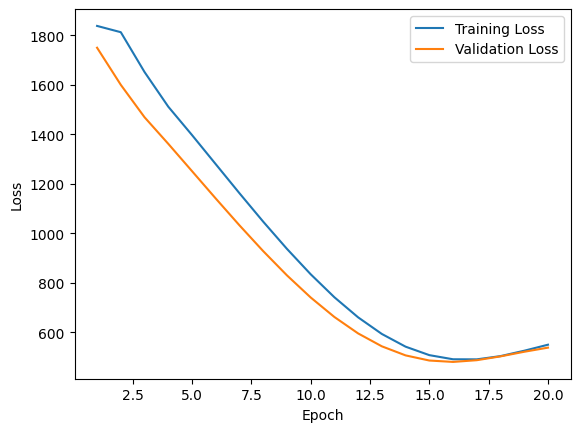

In [95]:

import torch.nn as nn
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.Adam(MLP_model.parameters(), lr=0.001)
num_epochs = 20
training_losses_list=[]
validation_losses_list=[]
lowest_val_loss = float('inf')

for epoch in range(num_epochs):
    # Forward Propagation
    outputs = MLP_model(final_training_set)

    # Computing loss
    training_loss = criterion(outputs,final_training_labels)

    # Backpropagation
    optimizer.zero_grad()
    training_loss.backward()
    optimizer.step()
    #print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    with torch.no_grad():
      valid_outputs = MLP_model(final_validation_set)
      val_loss = criterion(valid_outputs,final_validation_labels)

    training_losses_list.append(training_loss.item())
    validation_losses_list.append(val_loss.item())
#Saving the best checkpoint path
    if val_loss < lowest_val_loss:
        lowest_val_loss = val_loss
        best_epoch = epoch
        torch.save(MLP_model.state_dict(), 'MLP_model_checkpoint.pth')

plt.plot(range(1, num_epochs+1), training_losses_list, label='Training Loss')
plt.plot(range(1, num_epochs+1), validation_losses_list, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [96]:
#I have loaded the model checkpoint path and saved it in the working directory
MLP_model.load_state_dict(torch.load('MLP_model_checkpoint.pth'))


<All keys matched successfully>

In [100]:
'''
Evaluating my trained model on the Test Set
'''
with torch.no_grad():
    test_outputs = MLP_model(final_test_set)
    test_loss = criterion(test_outputs, test_labels)
    rmse_test_loss = torch.sqrt(test_loss)

print(rmse_test_loss)

tensor(22.7192)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([250])) that is different to the input size (torch.Size([250, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Next, I have plotted the "Predicted Value" vs "Ground Truth Value" in the form of a scatter plot for the no.of clips using the Test Set data.

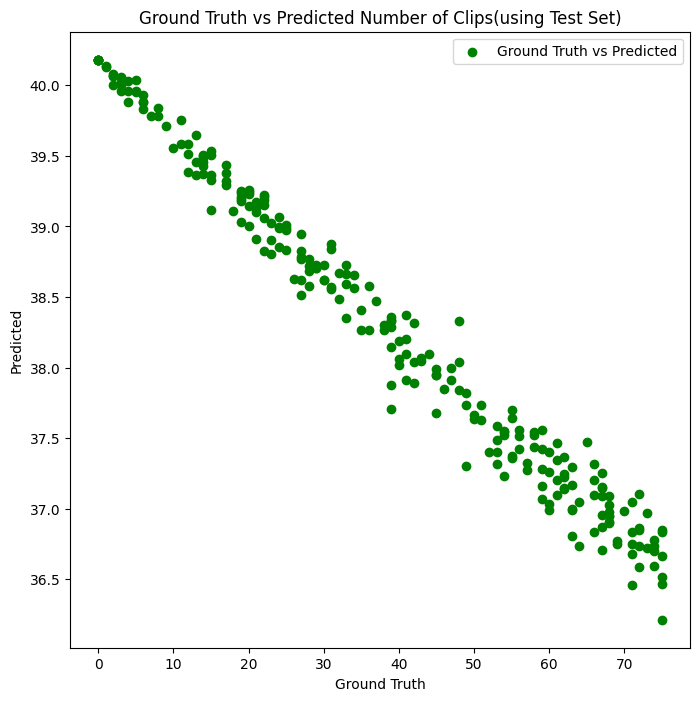

In [102]:
plt.figure(figsize=(8, 8))
plt.scatter(test_labels, test_outputs, c='green', label='Ground Truth vs Predicted')
plt.xlabel('Ground Truth')
plt.ylabel('Predicted')
plt.title('Ground Truth vs Predicted Number of Clips(using Test Set)')
plt.legend()
plt.show()

In [103]:
print(f'Epoch with lowest MSE on validation set: {best_epoch + 1}')
print(f'Average MSE on the test set: {test_loss.item():.4f}')
print(f'RMSE on the test set: {rmse_test_loss.item():.4f}')

Epoch with lowest MSE on validation set: 16
Average MSE on the test set: 516.1622
RMSE on the test set: 22.7192
